In [2]:
# https://en.wikipedia.org/wiki/Convolution

In [3]:
import numpy as np
from numpy import array as arr
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)

In [4]:
a = arr([1, 2, 3, 4])
b = arr([5, 6, 7, 8])

In [18]:
c = np.convolve(a, b)
print(c, len(c))

[ 5 16 34 60 61 52 32] 7


In [6]:
def conv1d(input_array, kernel):
  """
  Mimics np.convolve() function.

  Parameters:
      input_array (list or numpy array): Input array.
      kernel (list or numpy array): Kernel to convolve with input_array.

  Returns:
      numpy array: Convolved result.
  """
  input_length = len(input_array)
  kernel_length = len(kernel)
  output_length = input_length + kernel_length - 1
  output = [0] * output_length

  # Iterate through each position in the output array
  for i in range(output_length):
    # Calculate bounds for the input and kernel indices

    output[i] = input_array[max(0, i + 1 - kernel_length) : min(input_length, i + 1)] @ np.flip(
      kernel[max(0, i + 1 - input_length) : min(kernel_length, i + 1)]
    )

  return output

In [7]:
np.convolve(arr([1, 2, 3, 4]), arr([5, 6, 7]))

array([ 5, 16, 34, 52, 45, 28])

In [8]:
conv1d(arr([1, 2, 3, 4]), arr([5, 6, 7]))

[5, 16, 34, 52, 45, 28]

In [9]:
# Calculate Neighbours
grid = [1, 0, 0, 1, 1, 1, 0, 1, 1]
print(grid, len(grid))
kernel = [1, 1, 1]
res = np.convolve(grid, kernel)[1:-1] - grid
print(res, len(res))

[1, 0, 0, 1, 1, 1, 0, 1, 1] 9
[0 1 1 1 2 1 2 1 1] 9


In [10]:
def conv2d(input, kernel):
  H, W = input.shape
  M, N = kernel.shape
  out = np.zeros((H + M - 1, W + N - 1), dtype=float)
  for i in range(H + M - 1):
    for j in range(W + N - 1):
      out[i, j] = np.sum(
        input[max(0, i - M + 1) : min(i + 1, H), max(0, j - N + 1) : min(j + 1, W)]
        * np.flip(kernel[max(0, i - H + 1) : min(i + 1, M), max(0, j - W + 1) : min(j + 1, N)])
      )

  return out

In [17]:
block = np.array([[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 1, 0], [0, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])
kernel = np.ones((3, 3))

In [16]:
n_neighbours = conv2d(block, kernel)[1:-1, 1:-1]

array([[0., 0., 0., 0., 0., 0.],
       [0., 1., 2., 3., 2., 1.],
       [1., 3., 5., 5., 3., 1.],
       [1., 3., 5., 5., 3., 1.],
       [1., 2., 3., 2., 1., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [12]:
block

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

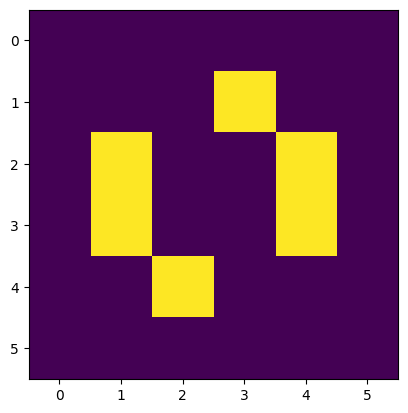

In [13]:
n_neighbours = conv2d(block, kernel)[1:-1, 1:-1] - block
next = block.copy()
next[n_neighbours < 2] = 0
next[n_neighbours == 3] = 1
next[n_neighbours > 3] = 0
plt.imshow(next)
block = next.copy()